In [5]:
#Tìm bí mật với 2 hình ảnh
import numpy as np
import cv2
import matplotlib.pyplot as plt

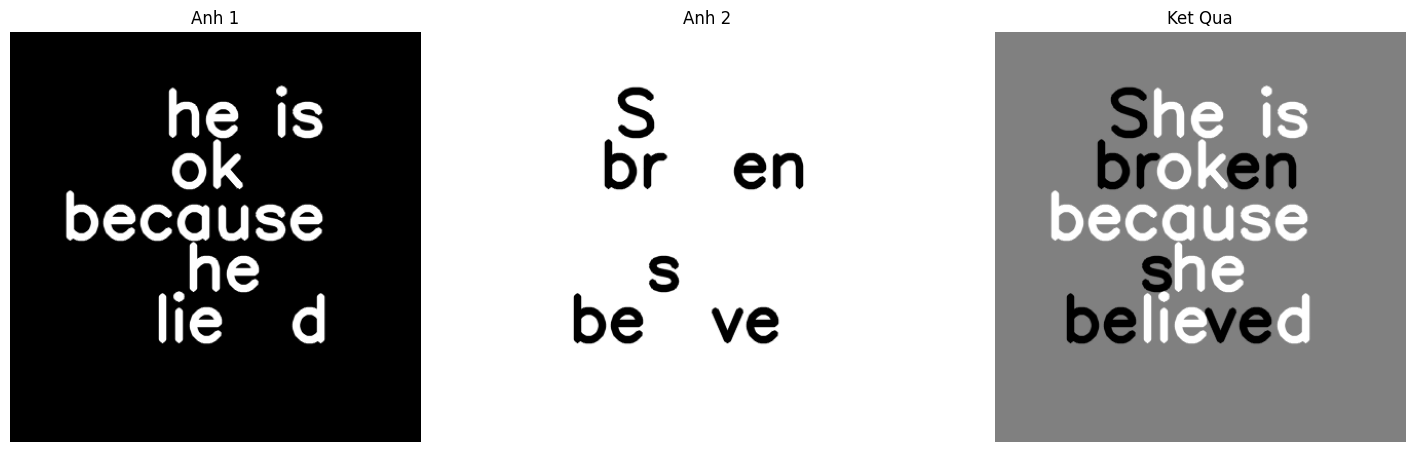

In [42]:
# Hàm tạo hình ảnh với văn bản trên nền trắng
def create_image_with_text(height, width, text_positions, font_scale=2, color=(0, 0, 0), thickness=5):
    img = np.ones((height, width, 3), np.uint8) * 255
    font = cv2.FONT_HERSHEY_SIMPLEX
    for text, position in text_positions:
        cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    return img

# Hàm tạo hình ảnh với văn bản trên nền đen
def create_image_with_white_text(height, width, text_positions, font_scale=2, color=(255, 255, 255), thickness=5):
    img = np.zeros((height, width, 3), np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for text, position in text_positions:
        cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    return img

# Tạo hình ảnh với nền trắng và văn bản đen
height = 400
width = 400
text_positions_white = [
    ('S', (110, 100)),
    ('br  en', (95, 150)),
    (' ', (50, 200)),
    ('s', (140, 250)),
    ('be  ve', (65, 300))
]
image_white = create_image_with_text(height, width, text_positions_white)

# Tạo hình ảnh với nền đen và văn bản trắng
text_positions_black = [
    ('he is', (150, 100)),
    ('ok', (155, 150)),
    ('because', (50, 200)),
    ('he', (170, 250)),
    ('lie  d', (140, 300))
]
image_black = create_image_with_white_text(height, width, text_positions_black)

# Cộng hai hình ảnh với hệ số trọng số
alpha = 0.5  # Hệ số trọng số cho hình ảnh trắng
beta = 0.5   # Hệ số trọng số cho hình ảnh đen
result_image = cv2.addWeighted(image_black, alpha, image_white, beta, 0)

# Hiển thị hình ảnh gốc và kết quả
def show_images_side_by_side(image1, image2, title1="Anh 1", title2="Anh 2"):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Ket Qua")
    axs[2].axis('off')

# Hiển thị kết quả
show_images_side_by_side(image_black, image_white)
